In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

test['source'] = 'test'
train['source'] = 'train'

df = pd.concat([train, test])

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [3]:
cols = df.columns.str.lower()
df.columns = cols

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [5]:
df.isnull().sum() / df.shape[0] * 100

passengerid     0.000000
survived       31.932773
pclass          0.000000
name            0.000000
sex             0.000000
age            20.091673
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.076394
cabin          77.463713
embarked        0.152788
source          0.000000
dtype: float64

Age - aqui eu vou precisar realizar um tratamento. Essa variável pode ter uma boa importância. 

Cabin - não vejo muita utilidade em utilizar essa variável. Posso deixar ela pra depois

# <font color = 'gold'> Data Exploration </font>

In [6]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


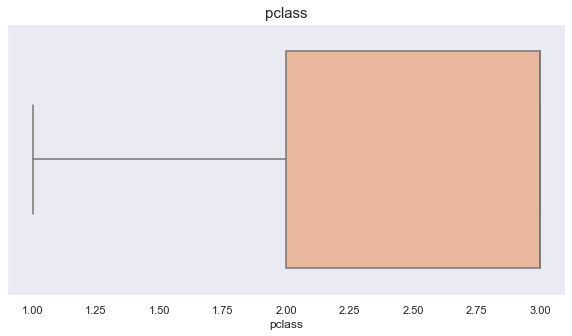

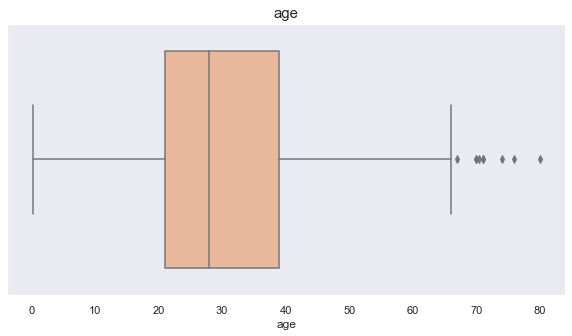

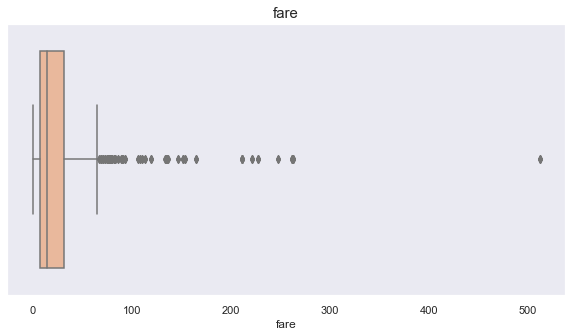

In [7]:
sns.set(style = 'dark', palette = 'rocket_r')
analysis_vars = ['pclass', 'age', 'fare']

for col in analysis_vars:
    fig = plt.figure(figsize = (10, 5))
    sns.boxplot(x = df[col])
    title= col
    plt.title(col, fontsize = 15)
    plt.show()

<Figure size 360x288 with 0 Axes>

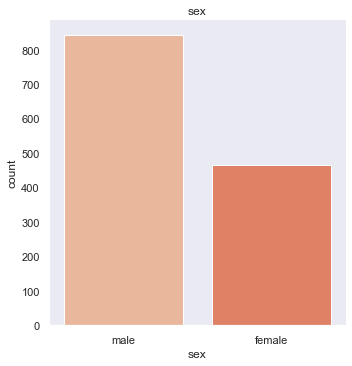

<Figure size 360x288 with 0 Axes>

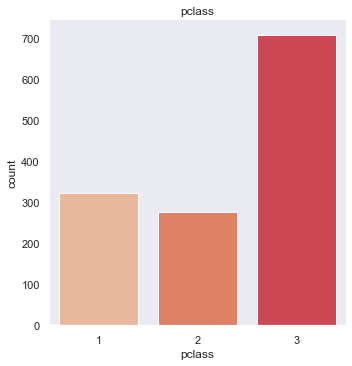

<Figure size 360x288 with 0 Axes>

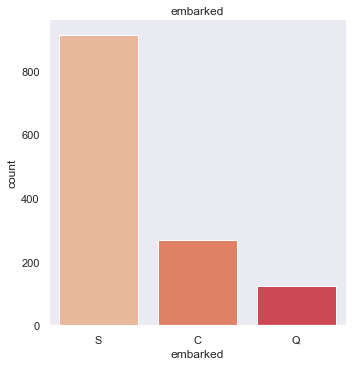

<Figure size 360x288 with 0 Axes>

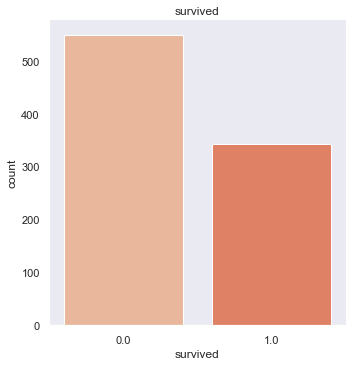

In [8]:
analysis_vars_cat = ['sex', 'pclass', 'embarked', 'survived']

for col in analysis_vars_cat:
    plt.figure(figsize = (5, 4))
    sns.catplot(data = df, x = col, kind = 'count')
    plt.title(col)
    plt.show()

In [9]:
df.loc[df.source == 'train'].groupby('survived').survived.count() / df.loc[df.source == 'train'].shape[0]

survived
0.0    0.616162
1.0    0.383838
Name: survived, dtype: float64

In [10]:
df.groupby('pclass').fare.mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [11]:
df.groupby('embarked').fare.mean()

embarked
C    62.336267
Q    12.409012
S    27.418824
Name: fare, dtype: float64

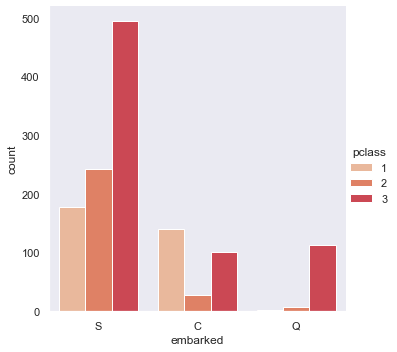

In [12]:
sns.catplot(data = df, x = 'embarked', hue = 'pclass', kind = 'count')

# <font color = 'gold'> Data Cleaning </font> 

In [13]:
df.loc[df.age.isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [14]:
df.groupby('sex').age.mean()

sex
female    28.687088
male      30.585228
Name: age, dtype: float64

In [15]:
mean_age_by_sex_and_survived = round(df.groupby(['sex', 'survived']).age.mean().reset_index().age.mean())

In [16]:
df.loc[df.age.isnull(), 'age'] = mean_age_by_sex_and_survived

In [17]:
df = df.loc[df.age >= 1]

In [18]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1297.000000,884.000000,1297.000000,1297.000000,1297.000000,1297.000000,1296.000000
mean,653.546646,0.378959,2.292984,29.769854,0.495759,0.375482,33.336268
std,377.834129,0.485403,0.839177,12.661901,1.043878,0.862517,51.870932
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,327.000000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,653.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,980.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# <font color = 'gold'> Feature Engineering </font>

In [19]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [20]:
# AGE RANGE
bins = [0, 12, 20, 35, 59, df.age.max()]
labels = ['kid', 'young', 'adult', 'adult_2','old']

age_bins = pd.cut(x = df.age, bins = bins, labels = labels)
df['age_range'] = age_bins

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_77117/2144969089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = age_bins


In [21]:
# FARE RANGE
q_25 = df.fare.quantile(0.25)
q_50 = df.fare.quantile(0.5)
max_value = df.fare.max()

bins = [0, q_25, q_50, max_value]
labels = ['cheap', 'moderate', 'expensive']

fare_bins = pd.cut(x = df.fare, bins = bins, labels = labels)

df['fare_range'] = fare_bins

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_77117/4023064335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_range'] = fare_bins


In [22]:
# TOTAL FAMILY NUMBER
df['total_family'] = df.sibsp + df.parch

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_77117/2881920387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_family'] = df.sibsp + df.parch


# <font color = 'gold'> Data Exploration - Part 2 <font>
### Multivariable Analysis

In [23]:
df_train = df.loc[df.source == 'train']

df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source,age_range,fare_range,total_family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,adult,cheap,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,adult_2,expensive,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,adult,moderate,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,adult,expensive,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,adult,moderate,0


In [24]:
df_train.corr()['survived']

passengerid    -0.009402
survived        1.000000
pclass         -0.341319
age            -0.043967
sibsp          -0.040023
parch           0.071266
fare            0.258852
total_family    0.008128
Name: survived, dtype: float64

In [25]:
def percent_analysis(df, column, column_extra = 'survived'):
    cols = [column, column_extra]
    map = df.groupby(cols).passengerid.nunique().reset_index()
    map['percent'] = map.passengerid / map.groupby(column).passengerid.transform('sum') * 100

    return map


def data_viz_barchart(df, y, var, axes, row, column, title):
    chart_percent = sns.barplot(data = df,
                                x = var,
                                y = y,
                                hue = 'survived',
                                ax = axes[row, column])
    title = title + var
    axes[row, column].set_title(title, fontsize = 15)

    for p in chart_percent.patches:
        chart_percent.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 9),
                            textcoords = 'offset points')

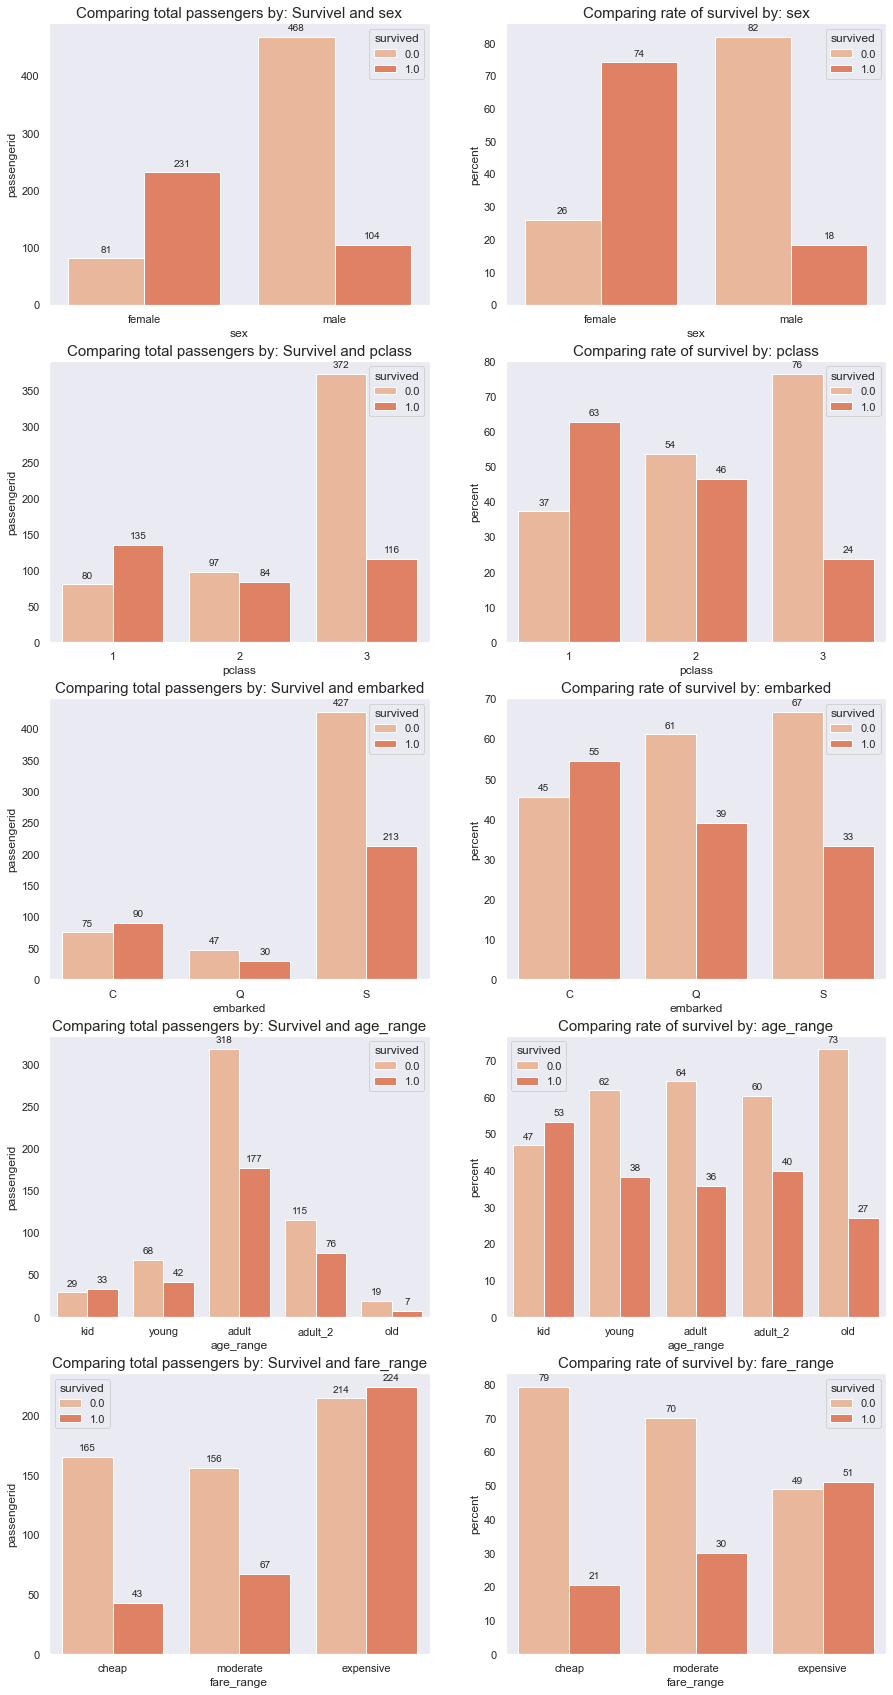

In [26]:
analysis_vars_cat = ['sex', 'pclass', 'embarked', 'age_range', 'fare_range']

fig, ax = plt.subplots(5, 2, figsize = (15, 30))
title_total = 'Comparing total passengers by: Survivel and '
title_percent = 'Comparing rate of survivel by: '

for row, var in enumerate(analysis_vars_cat):
    # total charts
    gb = df_train.groupby([var, 'survived']).passengerid.count().reset_index()
    data_viz_barchart(df = gb, y = 'passengerid', var = var, axes = ax, row = row, column = 0, title = title_total)

    # percent charts
    df_viz = percent_analysis(df_train, column = var)
    data_viz_barchart(df = df_viz, y = 'percent', var = var, axes = ax, row = row, column = 1, title = title_percent)

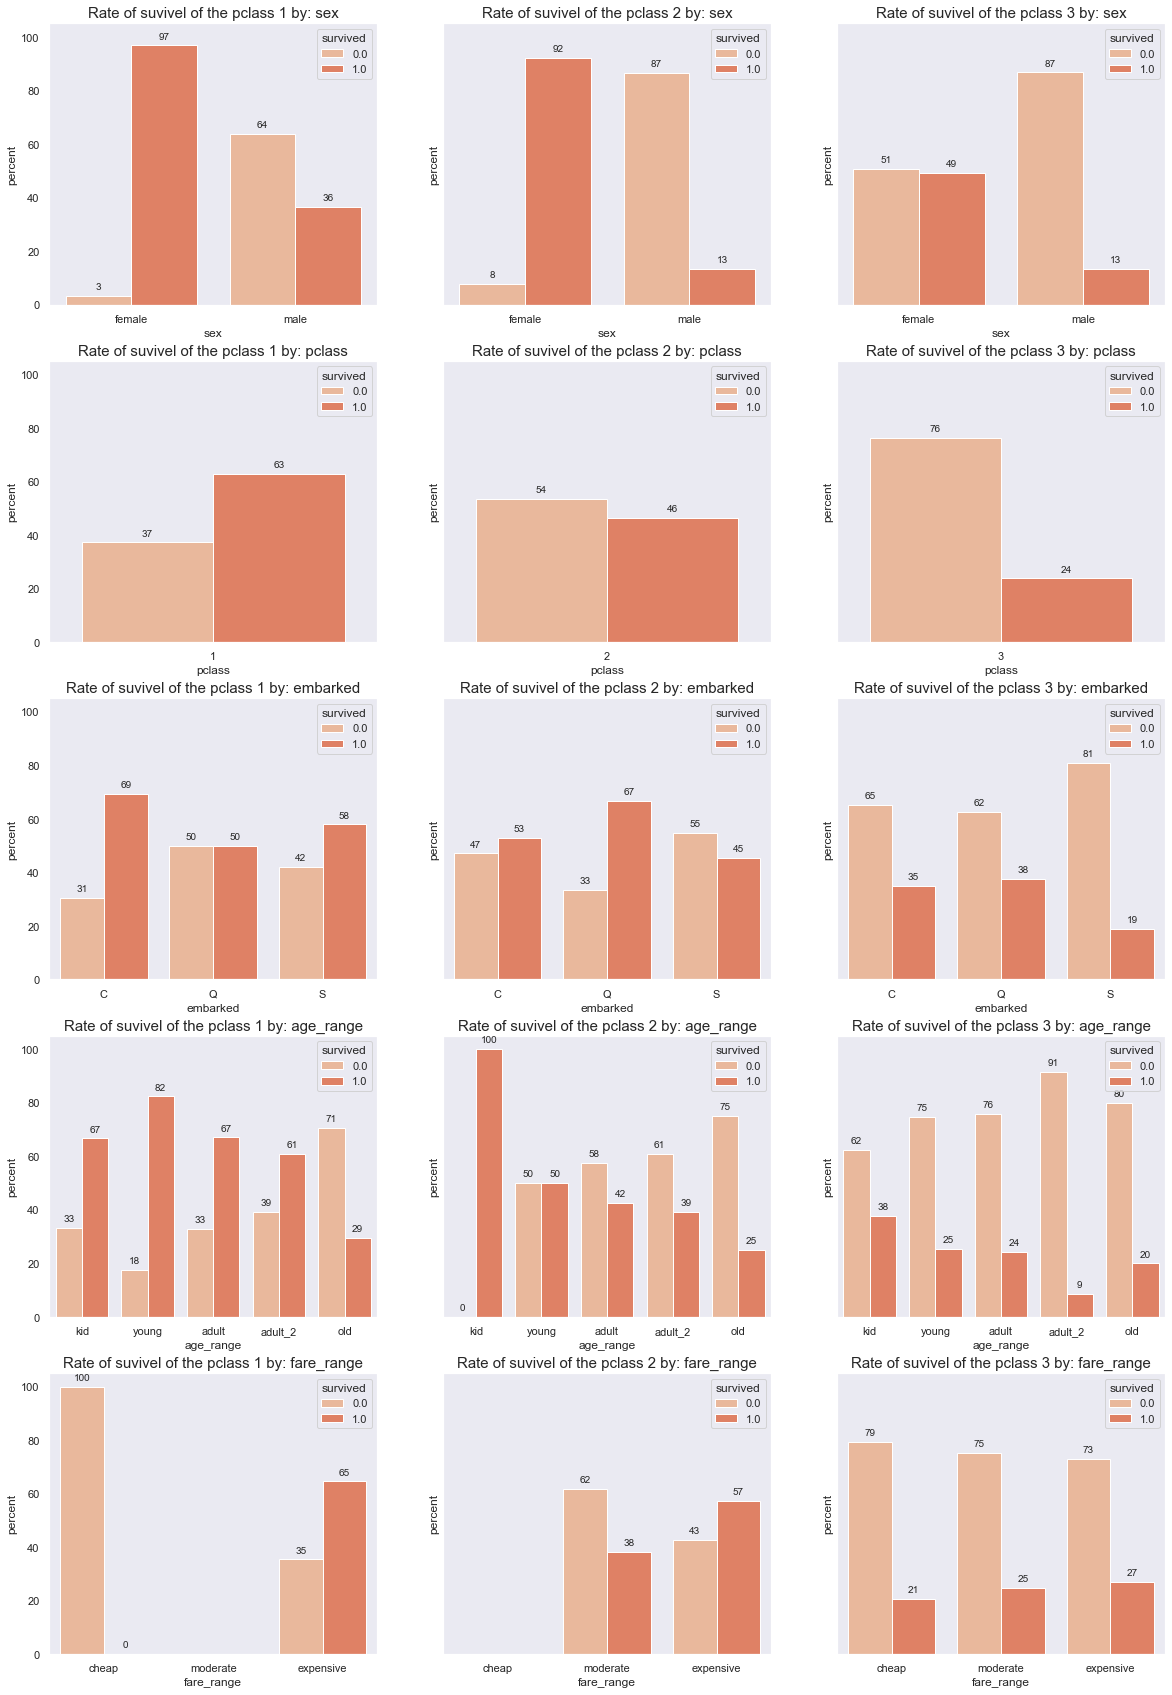

In [27]:
analysis_vars_cat = ['sex', 'pclass', 'embarked', 'age_range', 'fare_range']
fig, ax = plt.subplots(5, 3, figsize = (20, 30), sharey = True)



for pclass in range(3):
    for row, var in enumerate(analysis_vars_cat):
        # percent charts
        title = 'Rate of suvivel of the pclass ' + str(pclass + 1) + ' by: '
        df_viz = percent_analysis(df_train.loc[df_train.pclass == (pclass + 1)], column = var)
        data_viz_barchart(df = df_viz, y = 'percent', var = var, axes = ax, row = row, column = pclass, title = title)

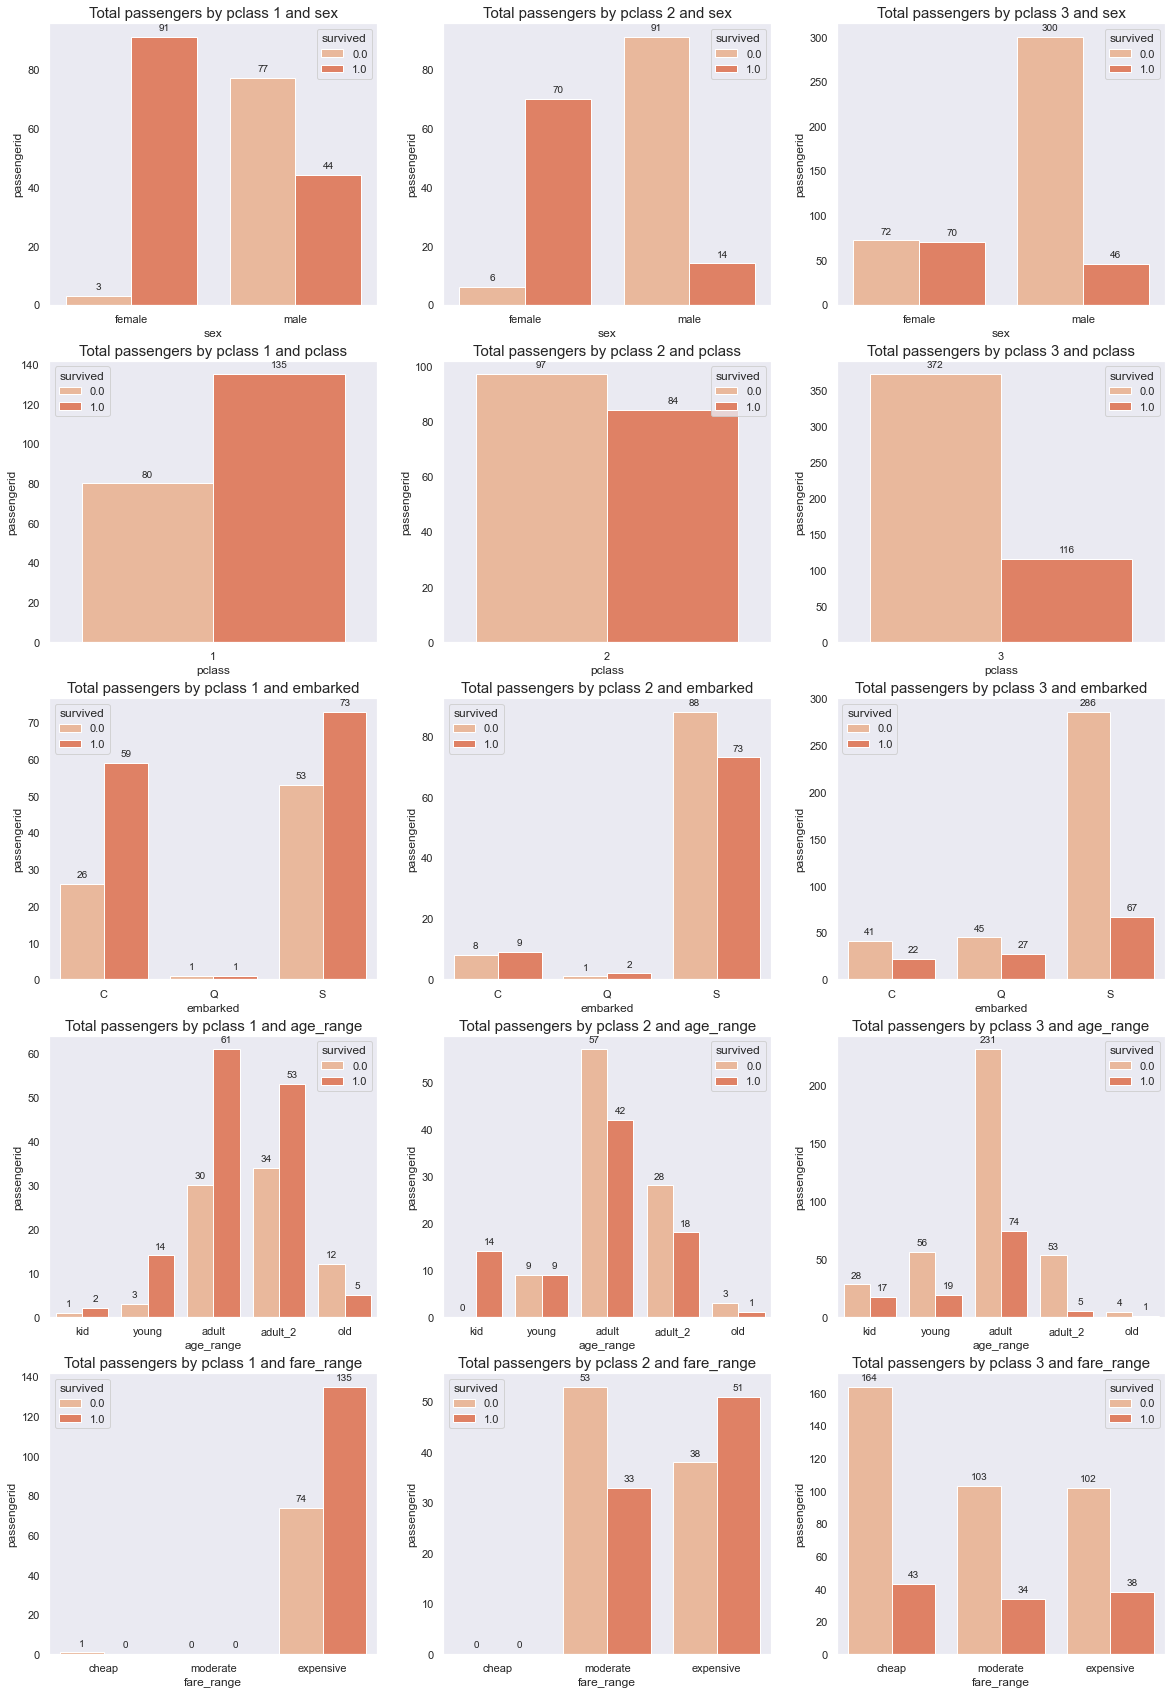

In [28]:
analysis_vars_cat = ['sex', 'pclass', 'embarked', 'age_range', 'fare_range']
fig, ax = plt.subplots(5, 3, figsize = (20, 30))

for pclass in range(3):
    for row, var in enumerate(analysis_vars_cat):
        # percent charts
        title = 'Total passengers by pclass ' + str(pclass + 1) + ' and '
        gb = df_train.loc[df_train.pclass == pclass + 1].groupby([var, 'survived']).passengerid.count().reset_index()
        data_viz_barchart(df = gb, y = 'passengerid', var = var, axes = ax, row = row, column = pclass, title = title)

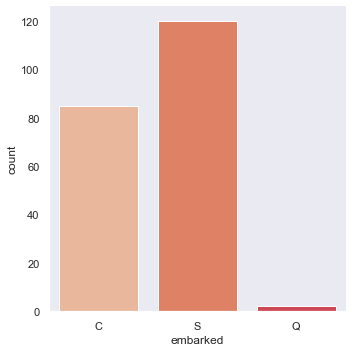

In [29]:
f = (df_train.fare_range == 'expensive') & (df_train.pclass == 1)
df_expensive_3pclass = df_train.loc[f]

sns.catplot(data = df_expensive_3pclass,
            x = 'embarked',
            kind = 'count')

<AxesSubplot:xlabel='pclass', ylabel='age'>

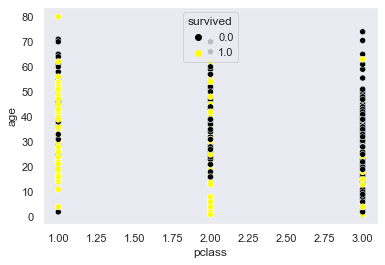

In [30]:
sns.scatterplot(data = df_train,
                x = 'pclass',
                y = 'age',
                hue = 'survived',
                palette = ['black', 'yellow'])